In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import IPython, torch, warnings
import geomsolver as gs

In [3]:
warnings.simplefilter('ignore')

<IPython.core.display.Javascript object>


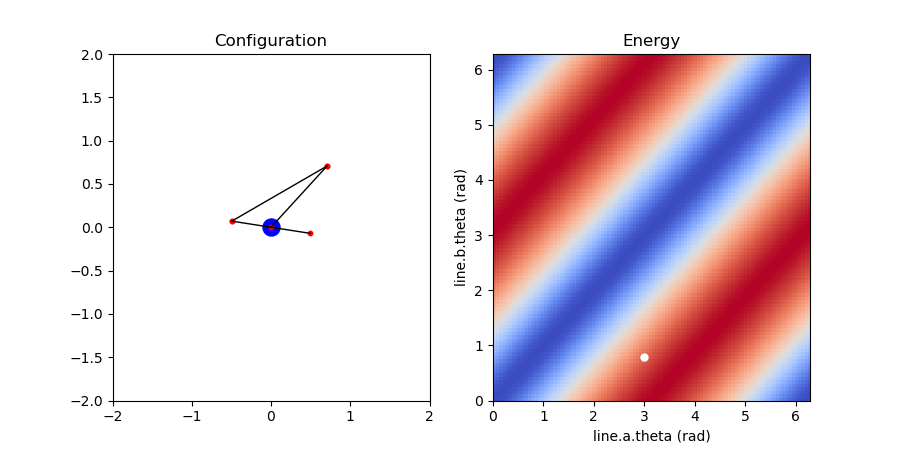

In [4]:
linkage = gs.Linkage()

In [5]:
linkage.show_controllers()

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [6]:
linkage.solve = False

In [7]:
A = linkage.add_anchorpoint(at=[0,0,0])

In [8]:
a = A.add_onpointline(L=1, theta=0, beta=0.5)

In [9]:
b = A.add_onpointline(L=1, theta=45, beta=0)

In [10]:
c = linkage.add_frompointsline(a.p2, b.p2)

In [11]:
with linkage.solve_off():
    c.constrain_length(0)

In [12]:
with linkage.solve_off():
    with linkage.manual_on():
        a.set_parameter('theta', np.linspace(0, 2*np.pi, 98).tolist())
        a.set_parameter('beta', np.linspace(0, 1, 48).tolist())
        b.set_parameter('theta', np.linspace(0, 2*np.pi, 99).tolist())
        b.set_parameter('beta', np.linspace(0, 1, 49).tolist())